<a href="https://colab.research.google.com/github/Bertaalcolea/Collagen_studies/blob/main/Rat_Bov_1_5mgml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Nombre del archivo EXACTO (con extensión)
file_path = "Rat_vs_Bov_1.5_limpio.xlsx"   # cambia si en Colab sale otro nombre

# 2) Leer la tabla (la que empieza en A1 con Time, T°350, F10...H12)
df = pd.read_excel(file_path)

# 3) Cambiar comas por puntos en todo (para que los números sean tipo 0.209)
df = df.replace(",", ".", regex=True)

# 4) Eliminar la fila de temperatura
df = df[df["Time"] != "T° 350"].copy()

# 5) Primera columna "Time" en realidad son los pozos
df = df.rename(columns={"Time": "well"})

# 6) Columnas de tiempo (todas menos 'well')
time_cols = [c for c in df.columns if c != "well"]

# 7) Pasar a formato largo: una fila = (well, tiempo, OD)
df_long = df.melt(
    id_vars="well",
    value_vars=time_cols,
    var_name="time_str",
    value_name="OD"
)

# 8) Convertir OD y tiempo a numérico
df_long["OD"] = pd.to_numeric(df_long["OD"], errors="coerce")

# ⬅️ AQUÍ ESTABA EL PROBLEMA: convertimos primero a str
df_long["time_s"] = pd.to_timedelta(df_long["time_str"].astype(str)).dt.total_seconds()

# 9) Quitar filas sin OD o sin tiempo
df_long = df_long.dropna(subset=["OD", "time_s"]).reset_index(drop=True)

df_long.head()


,well,time_str,OD,time_s
0,F10,00:00:12,0.209,12.0
1,F11,00:00:12,0.213,12.0
2,F12,00:00:12,0.185,12.0
3,G10,00:00:12,0.422,12.0
4,G11,00:00:12,0.369,12.0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Leer exactamente usando header=0 (la fila donde están Time, 0:00:12, etc.)
df = pd.read_excel("Rat_vs_Bov_1.5_limpio.xlsx", header=0)

# 2) Asegurar que la columna Time se llama "well"
df = df.rename(columns={"Time": "well"})

# 3) Convertir todas las OD a números (comas → puntos)
for c in df.columns:
    if c != "well":
        df[c] = df[c].astype(str).str.replace(",", ".")
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 4) Eliminar la fila T° 350 (es la temperatura)
df = df[df["well"] != "T° 350"].copy()

# 5) Convertir todas las columnas de tiempo a texto (PORQUE SON datetime.time)
time_cols = [c for c in df.columns if c != "well"]
df.rename(columns={c: str(c) for c in time_cols}, inplace=True)
time_cols = [c for c in df.columns if c != "well"]

# 6) Formato largo
df_long = df.melt(
    id_vars="well",
    value_vars=time_cols,
    var_name="time_str",
    value_name="OD"
)

# 7) Convertir time_str a segundos (convirtiendo primero a string)
df_long["time_s"] = pd.to_timedelta(df_long["time_str"].astype(str)).dt.total_seconds()

# 8) Quitar filas sin OD o sin tiempo
df_long = df_long.dropna(subset=["OD", "time_s"]).reset_index(drop=True)

df_long.head(20)


,well,time_str,OD,time_s
0,F10,00:00:12,0.209,12.0
1,F11,00:00:12,0.213,12.0
2,F12,00:00:12,0.185,12.0
3,G10,00:00:12,0.422,12.0
4,G11,00:00:12,0.369,12.0
5,G12,00:00:12,0.383,12.0
6,H10,00:00:12,0.254,12.0
7,H11,00:00:12,0.266,12.0
8,H12,00:00:12,0.280,12.0
9,F10,00:01:12,0.199,72.0


In [17]:
# Asignar condición según el pozo
def map_condition(w):
    if w in ["F10", "F11", "F12"]:
        return "Control"
    elif w in ["G10", "G11", "G12"]:
        return "Rat tail"
    elif w in ["H10", "H11", "H12"]:
        return "Bovine"
    else:
        return None

df_long["condition"] = df_long["well"].apply(map_condition)

# Nos quedamos solo con F10–12, G10–12, H10–12
df_long = df_long[df_long["condition"].notna()].copy()

# Ordenar por condición, pozo y tiempo (por estética)
df_long = df_long.sort_values(["condition", "well", "time_s"]).reset_index(drop=True)

df_long.head(12)


,well,time_str,OD,time_s,condition
0,H10,00:00:12,0.254,12.0,Bovine
1,H10,00:01:12,0.192,72.0,Bovine
2,H10,00:02:12,0.191,132.0,Bovine
3,H10,00:03:12,0.192,192.0,Bovine
4,H10,00:04:12,0.192,252.0,Bovine
5,H10,00:05:12,0.195,312.0,Bovine
6,H10,00:06:12,0.192,372.0,Bovine
7,H10,00:07:12,0.193,432.0,Bovine
8,H10,00:08:12,0.193,492.0,Bovine
9,H10,00:09:12,0.193,552.0,Bovine


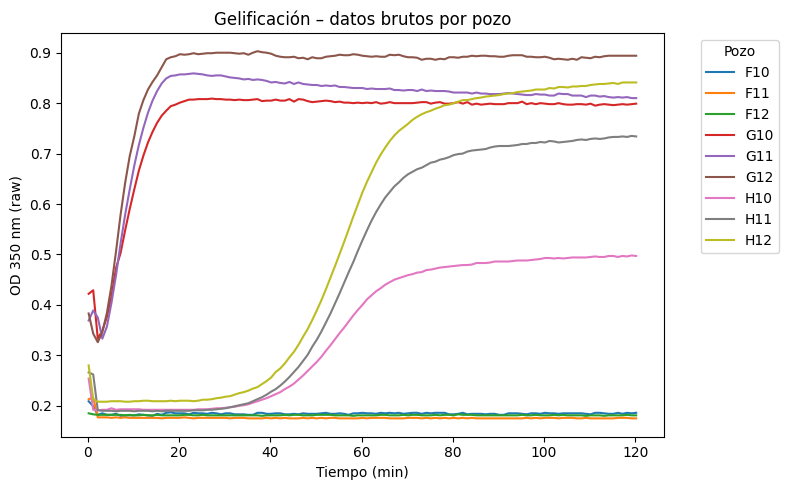

In [18]:
plt.figure(figsize=(8,5))

for well, sub in df_long.groupby("well"):
    plt.plot(sub["time_s"]/60, sub["OD"], label=well)

plt.xlabel("Tiempo (min)")
plt.ylabel("OD 350 nm (raw)")
plt.title("Gelificación – datos brutos por pozo")
plt.legend(title="Pozo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


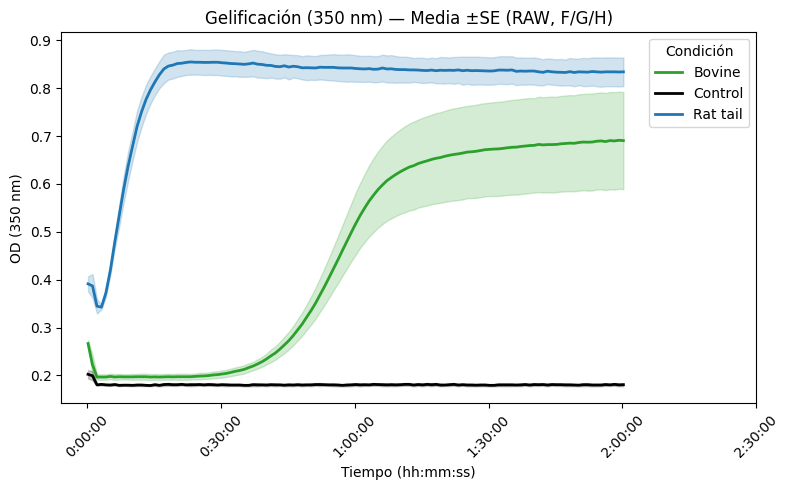

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Resumen por condición y tiempo: media, sd, n, se
df_sum_raw = (
    df_long
    .groupby(["condition", "time_s"])["OD"]
    .agg(["mean", "std", "count"])
    .reset_index()
)

df_sum_raw["se"] = df_sum_raw["std"] / np.sqrt(df_sum_raw["count"].clip(lower=1))

# 2) Paleta de colores (igual que en R)
pal = {
    "Rat tail": "#1f77b4",  # azul
    "Bovine":   "#2ca02c",  # verde
    "Control":  "#000000"   # negro
}

# 3) Ejes de tiempo (cada 30 min por ejemplo)
max_t = df_sum_raw["time_s"].max()
step = 30 * 60  # 30 minutos en segundos
x_ticks = np.arange(0, max_t + step, step)
x_labels = [f"{int(t//3600):01d}:{int((t%3600)//60):02d}:00" for t in x_ticks]

# 4) Gráfica
plt.figure(figsize=(8,5))

for cond, sub in df_sum_raw.groupby("condition"):
    # Curva media
    plt.plot(
        sub["time_s"],
        sub["mean"],
        label=cond,
        color=pal.get(cond, "grey"),
        linewidth=2
    )
    # Banda ±SE
    plt.fill_between(
        sub["time_s"],
        sub["mean"] - sub["se"],
        sub["mean"] + sub["se"],
        color=pal.get(cond, "grey"),
        alpha=0.2
    )

plt.xticks(x_ticks, x_labels, rotation=45)
plt.xlabel("Tiempo (hh:mm:ss)")
plt.ylabel("OD (350 nm)")
plt.title("Gelificación (350 nm) — Media ±SE (RAW, F/G/H)")
plt.legend(title="Condición")
plt.tight_layout()
plt.show()


In [20]:
import numpy as np

# 1) Media del control en cada tiempo
ctrl_wells = ["F10", "F11", "F12"]
df_ctrl = df_long[df_long["well"].isin(ctrl_wells)]

ctrl_mean = (
    df_ctrl.groupby("time_s")["OD"]
    .mean()
    .rename("OD_ctrl")
    .reset_index()
)

# 2) Añadir OD_ctrl a todos los pozos
df_corr = df_long.merge(ctrl_mean, on="time_s", how="left")

# 3) OD corregida
df_corr["OD_corr"] = df_corr["OD"] - df_corr["OD_ctrl"]

# 4) Normalización por pozo
def normalize_well(sub):
    sub = sub.copy()

    # baseline = primeros 5 minutos
    baseline = sub[sub["time_s"] <= 300]["OD_corr"].mean()

    # plateau = últimos 10 puntos
    plateau = sub["OD_corr"].tail(10).mean()

    # fallback por seguridad
    if not np.isfinite(plateau) or plateau <= baseline:
        plateau = sub["OD_corr"].max()

    # normalización
    od0 = sub["OD_corr"] - baseline
    od0[od0 < 0] = 0  # evita negativos

    sub["OD_norm"] = od0 / (plateau - baseline)
    sub["OD_norm"] = sub["OD_norm"].clip(0, 1)

    return sub

df_norm = (
    df_corr.groupby("well", group_keys=False)
    .apply(normalize_well)
    .reset_index(drop=True)
)

df_norm.head()


/tmp/ipython-input-384616040.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(normalize_well)


,well,time_str,OD,time_s,condition,OD_ctrl,OD_corr,OD_norm
0,H10,00:00:12,0.254,12.0,Bovine,0.202333,0.051667,0.120533
1,H10,00:01:12,0.192,72.0,Bovine,0.199333,-0.007333,0.000000
2,H10,00:02:12,0.191,132.0,Bovine,0.180333,0.010667,0.000000
3,H10,00:03:12,0.192,192.0,Bovine,0.181333,0.010667,0.000000
4,H10,00:04:12,0.192,252.0,Bovine,0.180333,0.011667,0.000000


In [21]:
pal = {
    "Rat tail": "#1f77b4",  # azul
    "Bovine":   "#2ca02c",  # verde
    "Control":  "#000000"   # negro
}


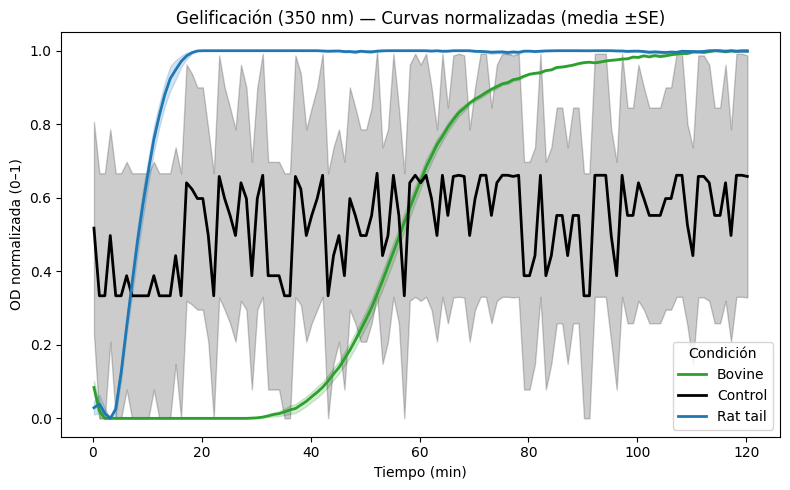

In [22]:
# resumen por condición
df_sum_norm = (
    df_norm.groupby(["condition", "time_s"])["OD_norm"]
    .agg(["mean", "std", "count"])
    .reset_index()
)

df_sum_norm["se"] = df_sum_norm["std"] / np.sqrt(df_sum_norm["count"].clip(lower=1))

plt.figure(figsize=(8,5))

for cond, sub in df_sum_norm.groupby("condition"):
    plt.plot(sub["time_s"]/60, sub["mean"], color=pal[cond], linewidth=2, label=cond)
    plt.fill_between(sub["time_s"]/60,
                     sub["mean"] - sub["se"],
                     sub["mean"] + sub["se"],
                     color=pal[cond], alpha=0.2)

plt.xlabel("Tiempo (min)")
plt.ylabel("OD normalizada (0–1)")
plt.title("Gelificación (350 nm) — Curvas normalizadas (media ±SE)")
plt.legend(title="Condición")
plt.tight_layout()
plt.show()


In [23]:
df_corr["OD_norm"] = np.nan  # crear columna vacía

for well, sub in df_corr.groupby("well"):
    cond = sub["condition"].iloc[0]

    if cond == "Control":
        # El control SIEMPRE debe quedar a 0 tras restarlo
        df_corr.loc[sub.index, "OD_norm"] = 0
        continue

    # Normalización solo para colágeno
    baseline = sub[sub["time_s"] <= 300]["OD_corr"].mean()
    plateau = sub["OD_corr"].tail(10).mean()

    if not np.isfinite(plateau) or plateau <= baseline:
        plateau = sub["OD_corr"].max()

    od0 = sub["OD_corr"] - baseline
    od0[od0 < 0] = 0

    df_corr.loc[sub.index, "OD_norm"] = (od0 / (plateau - baseline)).clip(0, 1)

df_norm = df_corr.copy()


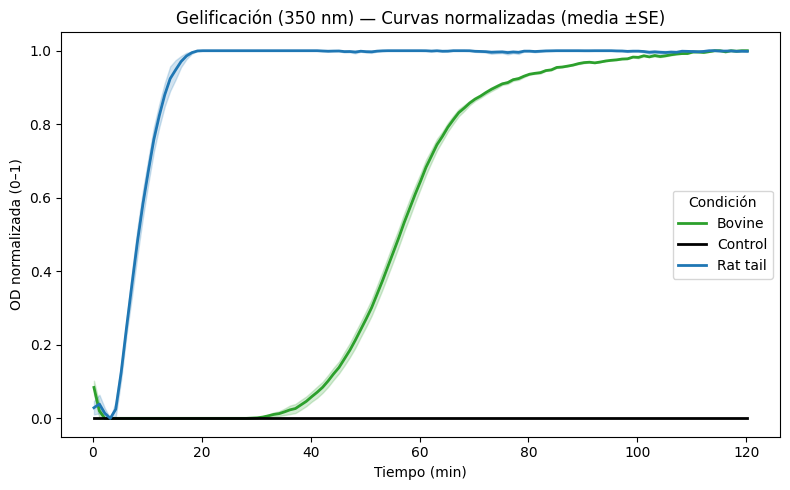

In [24]:
plt.figure(figsize=(8,5))

for cond, sub in df_norm.groupby("condition"):
    mean = sub.groupby("time_s")["OD_norm"].mean()
    se   = sub.groupby("time_s")["OD_norm"].sem()
    t    = mean.index / 60  # minutos

    plt.plot(t, mean, color=pal[cond], linewidth=2, label=cond)
    if cond != "Control":
        plt.fill_between(t, mean-se, mean+se, color=pal[cond], alpha=0.2)

plt.xlabel("Tiempo (min)")
plt.ylabel("OD normalizada (0–1)")
plt.title("Gelificación (350 nm) — Curvas normalizadas (media ±SE)")
plt.legend(title="Condición")
plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import pandas as pd

def calc_slope(sub):
    sub = sub.sort_values("time_s")

    # región 20–80%
    seg = sub[(sub["OD_norm"] >= 0.2) & (sub["OD_norm"] <= 0.8)]

    if len(seg) < 3:
        return np.nan

    # regresión lineal: OD_norm = a·t + b
    x = seg["time_s"].values
    y = seg["OD_norm"].values
    a, b = np.polyfit(x, y, 1)
    return a  # pendiente en unidades: 1/segundo

# calcular slope por pozo, excepto control
slopes = (
    df_norm[df_norm["condition"] != "Control"]
    .groupby("well")
    .apply(calc_slope)
    .reset_index()
    .rename(columns={0: "slope"})
)

slopes


/tmp/ipython-input-2502688346.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_slope)


,well,slope
0,G10,0.001515
1,G11,0.001889
2,G12,0.001649
3,H10,0.000596
4,H11,0.000612
5,H12,0.000595


In [26]:
def calc_t50(sub):
    sub = sub.sort_values("time_s")
    target = 0.5  # 50%

    for i in range(1, len(sub)):
        y_prev = sub.iloc[i-1]["OD_norm"]
        y_curr = sub.iloc[i]["OD_norm"]

        # cuando cruza 0.5
        if y_prev < target <= y_curr:
            x_prev = sub.iloc[i-1]["time_s"]
            x_curr = sub.iloc[i]["time_s"]

            # interpolación lineal
            t50 = x_prev + (target - y_prev) * (x_curr - x_prev) / (y_curr - y_prev)
            return t50
    return np.nan

t50_df = (
    df_norm[df_norm["condition"] != "Control"]
    .groupby("well")
    .apply(calc_t50)
    .reset_index()
    .rename(columns={0: "t50_s"})
)

t50_df


/tmp/ipython-input-3541151174.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_t50)


,well,t50_s
0,G10,544.214286
1,G11,497.220000
2,G12,470.888298
3,H10,3322.411765
4,H11,3449.896552
5,H12,3376.168831


In [27]:
# combinar slope + t50
df_kin = slopes.merge(t50_df, on="well")

df_kin["tlag_s"] = df_kin["t50_s"] - (0.5 / df_kin["slope"])

df_kin


,well,slope,t50_s,tlag_s
0,G10,0.001515,544.214286,214.110390
1,G11,0.001889,497.220000,232.463498
2,G12,0.001649,470.888298,167.660014
3,H10,0.000596,3322.411765,2483.218211
4,H11,0.000612,3449.896552,2632.584011
5,H12,0.000595,3376.168831,2535.159284


In [28]:
df_results = df_kin.merge(
    df_norm[["well","condition"]].drop_duplicates(),
    on="well"
).sort_values("condition")

df_results


,well,slope,t50_s,tlag_s,condition
3,H10,0.000596,3322.411765,2483.218211,Bovine
4,H11,0.000612,3449.896552,2632.584011,Bovine
5,H12,0.000595,3376.168831,2535.159284,Bovine
0,G10,0.001515,544.214286,214.110390,Rat tail
1,G11,0.001889,497.220000,232.463498,Rat tail
2,G12,0.001649,470.888298,167.660014,Rat tail


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Paleta de colores
pal = {
    "Rat tail": "#1f77b4",  # azul
    "Bovine":   "#2ca02c"   # verde
}

# Resumen por condición
summary = (
    df_results
    .groupby("condition")
    .agg(
        slope_mean = ("slope", "mean"),
        slope_se   = ("slope", lambda x: x.std(ddof=1)/np.sqrt(len(x))),
        t50_mean_s = ("t50_s", "mean"),
        t50_se_s   = ("t50_s",  lambda x: x.std(ddof=1)/np.sqrt(len(x))),
        tlag_mean_s= ("tlag_s","mean"),
        tlag_se_s  = ("tlag_s", lambda x: x.std(ddof=1)/np.sqrt(len(x))),
    )
)

# Pasar tiempos a minutos (para que sea más intuitivo)
summary["t50_mean_min"]  = summary["t50_mean_s"]  / 60
summary["t50_se_min"]    = summary["t50_se_s"]    / 60
summary["tlag_mean_min"] = summary["tlag_mean_s"] / 60
summary["tlag_se_min"]   = summary["tlag_se_s"]   / 60

summary


,slope_mean,slope_se,t50_mean_s,t50_se_s,tlag_mean_s,tlag_se_s,t50_mean_min,t50_se_min,tlag_mean_min,tlag_se_min
condition,,,,,,,,,,
Bovine,0.000601,0.000006,3382.825716,36.951898,2550.320502,43.779495,56.380429,0.615865,42.505342,0.729658
Rat tail,0.001684,0.000109,504.107528,21.445696,204.744634,19.284371,8.401792,0.357428,3.412411,0.321406


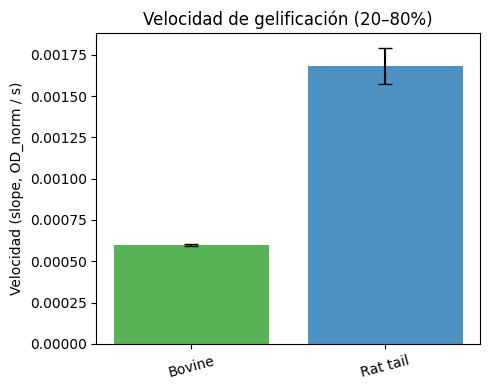

In [30]:
conditions = summary.index.tolist()
x = np.arange(len(conditions))
colors = [pal[c] for c in conditions]

plt.figure(figsize=(5,4))

plt.bar(
    x,
    summary["slope_mean"],
    yerr=summary["slope_se"],
    color=colors,
    alpha=0.8,
    capsize=5
)

plt.xticks(x, conditions, rotation=15)
plt.ylabel("Velocidad (slope, OD_norm / s)")
plt.title("Velocidad de gelificación (20–80%)")

plt.tight_layout()
plt.show()


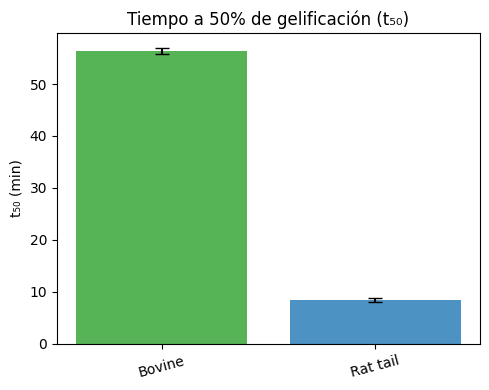

In [31]:
plt.figure(figsize=(5,4))

plt.bar(
    x,
    summary["t50_mean_min"],
    yerr=summary["t50_se_min"],
    color=colors,
    alpha=0.8,
    capsize=5
)

plt.xticks(x, conditions, rotation=15)
plt.ylabel("t₅₀ (min)")
plt.title("Tiempo a 50% de gelificación (t₅₀)")

plt.tight_layout()
plt.show()


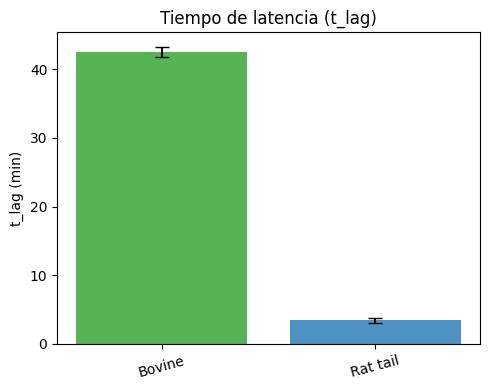

In [32]:
plt.figure(figsize=(5,4))

plt.bar(
    x,
    summary["tlag_mean_min"],
    yerr=summary["tlag_se_min"],
    color=colors,
    alpha=0.8,
    capsize=5
)

plt.xticks(x, conditions, rotation=15)
plt.ylabel("t_lag (min)")
plt.title("Tiempo de latencia (t_lag)")

plt.tight_layout()
plt.show()
